# Digital Futures Capstone Project ; Predicting the key factors that determine the intensity of Lung Cancer

In [1]:
#import the big 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#import sklearn such as standard scalar and train test split for the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#an import of couple models could be adding more later depending on the models i will be picking.
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, roc_curve, roc_auc_score

In [2]:
lung_cancer = pd.read_csv('lung_cancer_dataset.csv') #import the CSV file onto jupyter notebook

In [3]:
lung_cancer.head() #Check the first few rows and the columns of the dataset.

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


### EDA

In [4]:
#Replace the spaces in the headers with an underscore
# Use the replace function
lung_cancer = lung_cancer.rename(columns=lambda x: x.replace(' ', '_'))

In [5]:
lung_cancer = lung_cancer.rename(columns={'Level': 'Intensity_Of_Cancer'}) # rename the level column so that the target column is clear

In [6]:
lung_cancer.isnull().sum() #Check for any nulls in the data

Patient_Id                  0
Age                         0
Gender                      0
Air_Pollution               0
Alcohol_use                 0
Dust_Allergy                0
OccuPational_Hazards        0
Genetic_Risk                0
chronic_Lung_Disease        0
Balanced_Diet               0
Obesity                     0
Smoking                     0
Passive_Smoker              0
Chest_Pain                  0
Coughing_of_Blood           0
Fatigue                     0
Weight_Loss                 0
Shortness_of_Breath         0
Wheezing                    0
Swallowing_Difficulty       0
Clubbing_of_Finger_Nails    0
Frequent_Cold               0
Dry_Cough                   0
Snoring                     0
Intensity_Of_Cancer         0
dtype: int64

In [7]:
lung_cancer.info() # info on the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient_Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air_Pollution             1000 non-null   int64 
 4   Alcohol_use               1000 non-null   int64 
 5   Dust_Allergy              1000 non-null   int64 
 6   OccuPational_Hazards      1000 non-null   int64 
 7   Genetic_Risk              1000 non-null   int64 
 8   chronic_Lung_Disease      1000 non-null   int64 
 9   Balanced_Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive_Smoker            1000 non-null   int64 
 13  Chest_Pain                1000 non-null   int64 
 14  Coughing_of_Blood        

In [8]:
lung_cancer

,Patient_Id,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Intensity_Of_Cancer
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [9]:
#Making sure that all the words and headers are lowercased
lung_cancer = lung_cancer.applymap(lambda s: s.lower() if type(s) == str else s)
lung_cancer.columns = map(str.lower, lung_cancer.columns)

In [10]:
lung_cancer

,patient_id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,intensity_of_cancer
0,p1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,low
1,p10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,medium
2,p100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,high
3,p1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,high
4,p101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,p995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,high
996,p996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,high
997,p997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,high
998,p998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,high


In [11]:
#Dropping the PatientID
lung_cancer.drop(["patient_id"], axis=1, inplace = True)

In [12]:
#Checking to see if this has worked
lung_cancer

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,intensity_of_cancer
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,high
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,high
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,high
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,high
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,high
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,high


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'air_pollution'}>,
        <AxesSubplot:title={'center':'alcohol_use'}>,
        <AxesSubplot:title={'center':'dust_allergy'}>],
       [<AxesSubplot:title={'center':'occupational_hazards'}>,
        <AxesSubplot:title={'center':'genetic_risk'}>,
        <AxesSubplot:title={'center':'chronic_lung_disease'}>,
        <AxesSubplot:title={'center':'balanced_diet'}>,
        <AxesSubplot:title={'center':'obesity'}>],
       [<AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'passive_smoker'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'coughing_of_blood'}>,
        <AxesSubplot:title={'center':'fatigue'}>],
       [<AxesSubplot:title={'center':'weight_loss'}>,
        <AxesSubplot:title={'center':'shortness_of_breath'}>,
        <AxesSubplot:title={'center':'wheezing'}>,
        <Axes

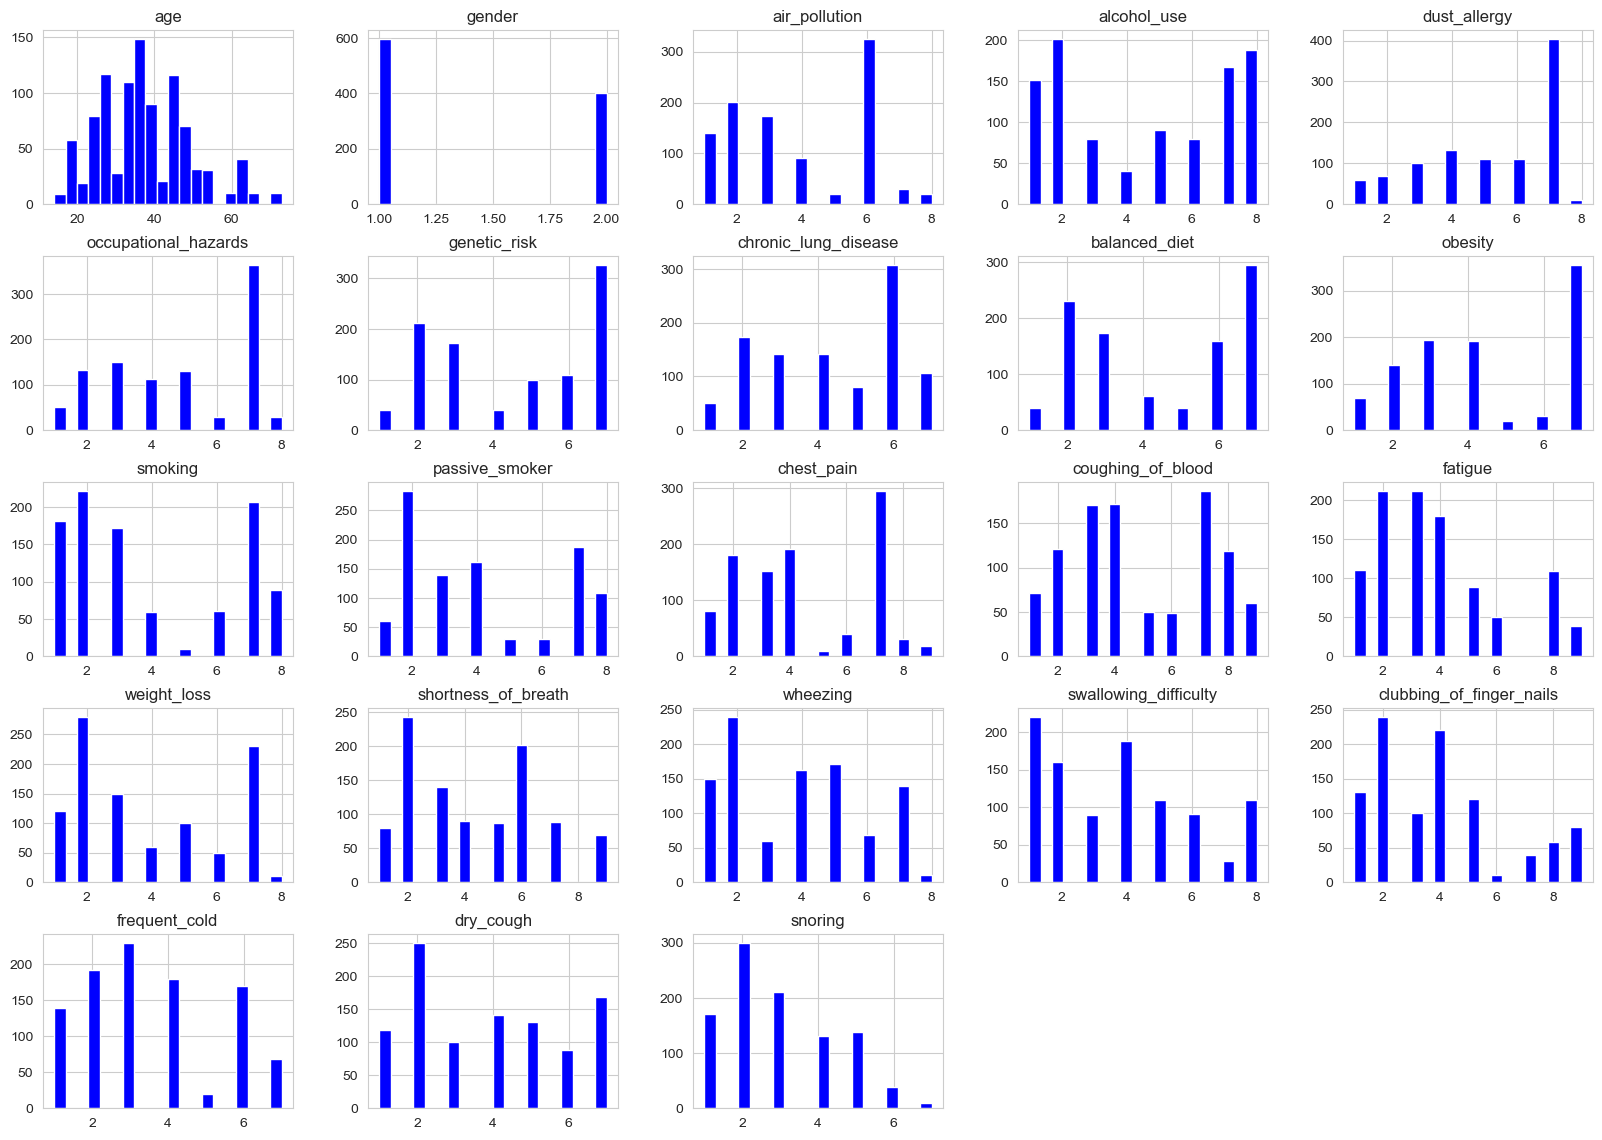

In [13]:
lung_cancer.hist(bins=20, color='blue', figsize=(20, 14)) # each data type on a histogram

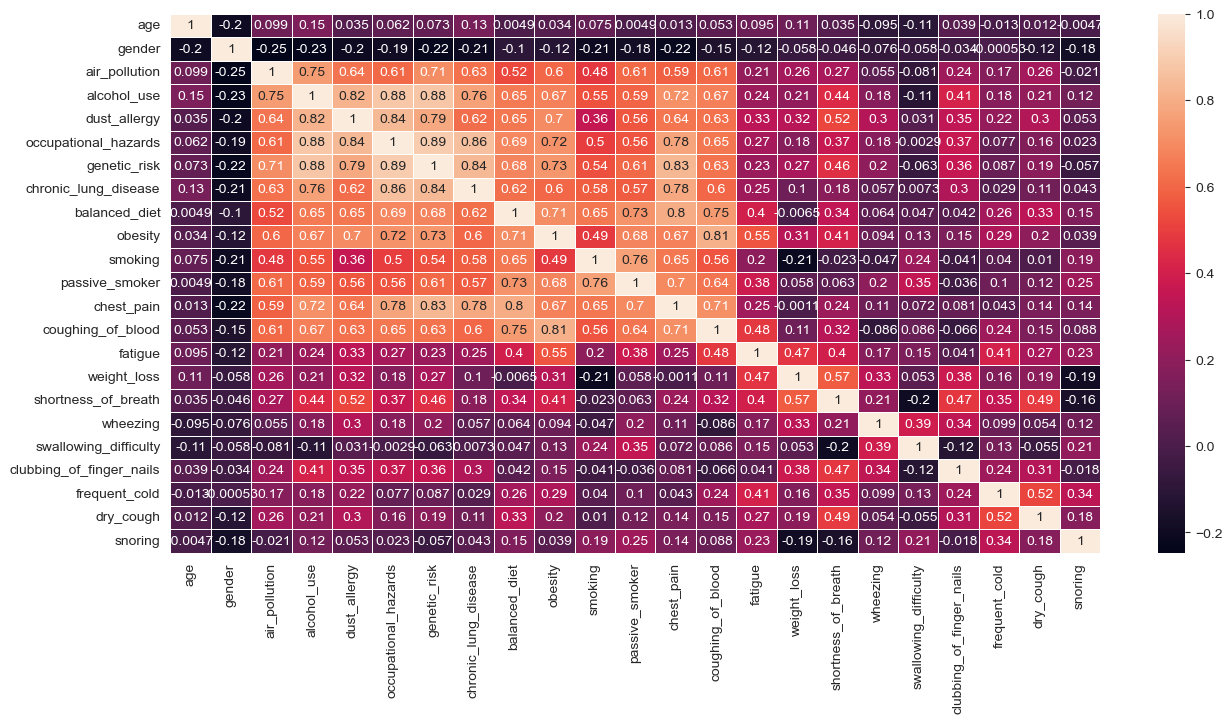

In [14]:
#Correlation matrix checking to see the correlation between the numerical data
plt.figure(figsize = (15,7))

corrMatrix = lung_cancer.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5);

In [15]:
# To check the count of cancer intensity to see if there is a balance in the dataset
lung_cancer['intensity_of_cancer'].value_counts()

high      365
medium    332
low       303
Name: intensity_of_cancer, dtype: int64

In [16]:
lung_cancer.describe()

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


### Data Analysis

In [30]:
#First i wanted to see how the ages were distributed against the intensity of lung cancer
fig = px.histogram(lung_cancer, x = 'age', color = 'intensity_of_cancer', nbins = 10, title = 'Distribution of Ages', text_auto = True)
fig.show()

In [24]:
#Showing distribution of Chronic Lung Disease
fig = px.histogram(lung_cancer, x = 'chronic_lung_disease', y = 'gender', color = 'intensity_of_cancer', barmode = 'group', nbins = 10, title = 'Distribution of Chronic Lung Disease', text_auto = True)
fig.show()

In [29]:
#group the genders together for the distribution of Lung Disease
fig = px.histogram(lung_cancer, x = 'smoking', y = 'gender', color = 'intensity_of_cancer', barmode = 'group', nbins = 10, title = 'Distribution of Smoking', text_auto = True)
fig.show()

In [27]:
#showing the distribution of coughing blood against the intensity of lung cancer
fig = px.histogram(lung_cancer, x = 'coughing_of_blood', y = 'gender', color = 'intensity_of_cancer', barmode = 'group', nbins = 10, title = 'Distribution of Coughing of Blood', text_auto = True)
fig.show()

In [31]:
#Distribution of Alcohol Use
fig = px.histogram(lung_cancer, x = 'alcohol_use', y = 'gender', color = 'intensity_of_cancer', barmode = 'group', nbins = 10, title = 'Distribution of Alcohol Use', text_auto = True)
fig.show()

In [33]:
#Genetic Risk against the intensity of lung cancer
fig = px.histogram(lung_cancer, x = 'genetic_risk', y = 'gender', color = 'intensity_of_cancer', barmode = 'group', nbins = 10, title = 'Distribution of Genetic Risk', text_auto = True)
fig.show()